# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [31]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Create two new dataframes
north_df = pd.read_csv("./NorthCallCenter.csv")
north_df = pd.DataFrame(north_df)
south_df = pd.read_csv("./SouthCallCenter.csv")
south_df = pd.DataFrame(south_df)
# Explore content of DataFrames
north_df.info(), south_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

(None, None)

## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [32]:
# EDA Question 1A solution below:
north_reps = north_df['Rep ID'].unique()
print(north_reps)

['Brent' 'Cam' 'Todd' 'Duke' 'Joe' 'Lilly' 'Amanda' 'Andy' 'Xander']


#### EDA Question 1B:  How many reps are in the South branch?  

In [33]:
# EDA Question 1B solution Below:
south_reps = south_df['Rep ID'].unique()
print(south_reps)

['Kate' 'Eric' 'Susan' 'Alice' 'Sandy' 'Karl' 'Randy' 'George' 'Helga'
 'Josh' 'Sharon']


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [34]:
# EDA Question 2A solution Below:
n_avg_busy_min = north_df['Busy Minutes'].mean()
n_avg_notready_min = north_df['Not Ready Minutes'].mean()
n_avg_incomingwait_min = north_df['Incoming Wait Time'].mean()
n_avg_duringcallwait_min = north_df['During Call Wait Time'].mean()

n_avg_busy_min.round(2), n_avg_notready_min.round(2), n_avg_incomingwait_min.round(2), n_avg_duringcallwait_min.round(2)

(np.float64(9.99), np.float64(1.91), np.float64(3.05), np.float64(2.97))

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [35]:
# EDA Question 2B solution Below:
s_avg_busy_min = south_df['Busy Minutes'].mean()
s_avg_notready_min = south_df['Not Ready Minutes'].mean()
s_avg_incomingwait_min = south_df['Incoming Wait Time'].mean()
s_avg_duringcallwait_min = south_df['During Call Wait Time'].mean()

s_avg_busy_min.round(2), s_avg_notready_min.round(2), s_avg_incomingwait_min.round(2), s_avg_duringcallwait_min.round(2)

(np.float64(10.05), np.float64(1.91), np.float64(3.0), np.float64(3.08))

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [36]:
# EDA Question 3 solution Below:
n_num_calls_by_timeblock = north_df.groupby('Time Block')['Calls'].sum()
n_num_calls_by_timeblock

s_num_calls_by_timeblock = south_df.groupby('Time Block')['Calls'].sum()
s_num_calls_by_timeblock

both_num_calls_by_timeblock = n_num_calls_by_timeblock + s_num_calls_by_timeblock
both_num_calls_by_timeblock
# Select only movies from the Science Fiction genre
#  science_fiction = movies_dataframe[(movies_dataframe['Genre'] == "Science Fiction") & (movies_dataframe['Release'] <= 2010)]

Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64

##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11

- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91 
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97

- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08

- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43

## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [37]:
# Question 1 solution below
north_df.isnull().sum(), south_df.isnull().sum()

(Unnamed: 0                 0
 Branch                     0
 Call Purpose               0
 Time Block                 0
 Incoming or Outgoing       0
 Queue                      0
 Rep ID                     0
 Sale                       0
 Lost Call                  0
 Abandoned                  0
 Busy Minutes               0
 Not Ready Minutes          0
 Incoming Wait Time       163
 During Call Wait Time      0
 Calls                      0
 dtype: int64,
 Unnamed: 0                 0
 Branch                     0
 Call Purpose               0
 Time Block                 0
 Incoming or Outgoing       0
 Queue                      0
 Rep ID                     0
 Sale                       0
 Lost Call                  0
 Abandoned                  0
 Busy Minutes               0
 Not Ready Minutes          0
 Incoming Wait Time       188
 During Call Wait Time      0
 Calls                      0
 dtype: int64)

#### Record your answer below:

> Your Answer: Yes, there is missing data in both the North and South Call Centers 'Incoming Wait Time' column. 

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [38]:
# Cleaning Question 2 solution below:
# north_sale_option = north_df['Sale'].unique()
north_sale_option_count = north_df['Sale'].value_counts()
# north_sale_option, north_sale_option_count

north_df['Sale'] = north_df['Sale'].str.replace(' ', '')
north_sale_option = north_df['Sale'].unique()
north_sale_option

array(['NO', 'YES'], dtype=object)

##### Record your answer by below:
> Your Answer: There must've been an unintended space entry after some of the YES values. I can use the strip() method to remove leading and trailing whitespace in the Sale column.

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [39]:
# Cleaning Question 3 solution below:
n_dupes = north_df.duplicated()
s_dupes = south_df.duplicated()

n_dupes.unique(), s_dupes.unique()

(array([False]), array([False]))

##### Record your answer below:
> Your Answer: There are no duplicates.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [40]:
# Cleaning Question 4 solution below:
# Check the count of values in the Calls column
north_df['Calls'].value_counts(), south_df['Calls'].value_counts()
# Drop columns Unnamed: 0 and Calls from both dfs
north_df.drop(columns=['Unnamed: 0','Calls'])
south_df.drop(columns=['Unnamed: 0', 'Calls'])

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2


##### Record your answer below:
> Your Answer: The Unnamed column is simply an index of the entries. It was removed as the indexes are already providing row numbers. I also determined that the Calls column only contained 1 as any value. This is unneccessary because it does not provide any additional information in the dataset. We know that each row corresponds to 1 call (one to one relationship). Upon discussion with Christian, Calls column can be really beneficial in further analysis.

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [80]:
# Create dataframe for the entire company named df
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.concat([north_df, south_df])
df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [42]:
# Manipulation Question solution below:
nrep_most_calls = north_df.groupby(["Rep ID"]).sum('Calls')
nrep_most_calls.sort_values(by='Calls', ascending=False)

srep_most_calls = south_df.groupby(["Rep ID"]).sum('Calls')
srep_most_calls.sort_values(by='Calls', ascending=False)

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,
Eric,5039,0,0,361,54,47.0,112,35
Randy,4576,3,1,320,66,47.0,98,33
Sandy,4694,1,0,325,60,34.0,100,32
Helga,5236,0,2,292,58,36.0,95,31
George,4620,0,0,298,53,41.0,87,29
Kate,4615,0,0,291,61,37.0,83,29
Karl,4532,1,0,287,61,26.0,85,28
Josh,3960,3,0,260,50,31.0,83,26
Susan,4006,2,0,267,53,35.0,88,26


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent, 37 calls
- South Branch = Eric, 35 calls

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [43]:
# Manipulation Question 2 solution below:
# North Branch
n_calls_count = north_df['Calls'].count()
n_calls_count
n_abandonment_rate = (north_df['Abandoned'].sum()/n_calls_count)*100
n_abandonment_rate.round(2)

# South Branch
s_calls_count = south_df['Calls'].count()
s_calls_count
s_abandonment_rate = (south_df['Abandoned'].sum()/s_calls_count)*100
s_abandonment_rate.round(2)

# Company Wide
df_calls_count = df['Calls'].count()
df_calls_count
df_abandonment_rate = (df['Abandoned'].sum()/df_calls_count)*100
df_abandonment_rate.round(2)

np.float64(1.97)

##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? Yes, but in that the South Branch on its own and then company-wide, the average call abandonment rates are better than the optimal range at 1.27% and 1.97%, respectively!


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [183]:
# Manipulation Question 3 solution below:
# North Branch Service Level
n_incoming_calls_ct = (north_df['Incoming or Outgoing']=='Incoming').sum()
n_incoming_calls_ct
# 82 incoming calls in North Branch
n_incoming_time = north_df[(north_df['Incoming or Outgoing']=='Incoming') & (north_df['Incoming Wait Time']<=2.0)]
n_incoming_time.shape[0]
# 33 Incoming calls in the North Branch were answered within 2.0 seconds
n_service_level = (33/n_incoming_calls_ct)*100
n_service_level.round(2)
# 40.24%

# South Branch Service Level
s_incoming_calls_ct = (south_df['Incoming or Outgoing']=='Incoming').sum()
s_incoming_calls_ct
# 126 incoming calls in South Branch
s_incoming_time = south_df[(south_df['Incoming or Outgoing']=='Incoming') & (south_df['Incoming Wait Time']<=2.0)]
s_incoming_time.shape[0]
# 48 Incoming calls in the South Branch were answered within 2.0 seconds
s_service_level = (48/s_incoming_calls_ct)*100
s_service_level.round(2)
#38.10%

# Company Wide Service Level Using the Same Method with Concatenated DataFrame
df_incoming_calls_ct = (df['Incoming or Outgoing']=='Incoming').sum()
df_incoming_calls_ct
# 208 incoming calls company wide
df_incoming_time = df[(df['Incoming or Outgoing']=='Incoming') & (df['Incoming Wait Time']<=2.0)]
df_incoming_time.shape[0]
# 81 Incoming calls Company Wide were answered within 2.0 seconds
df_service_level = (81/df_incoming_calls_ct)*100
df_service_level.round(2)
# 38.94%

# Company Wide Service Level using more direct method
df_incoming_calls_ct = n_incoming_calls_ct + s_incoming_calls_ct
df_incoming_calls_ct
# 208 incoming calls company wide
df_incoming_time = n_incoming_time.shape[0] + s_incoming_time.shape[0]
df_incoming_time
# 81 incoming calls Company wide were answered within 2.0 seconds
df_service_level = (df_incoming_time/df_incoming_calls_ct)*100
df_service_level.round(2)
# 38.94%

np.float64(38.94)

##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24% with 33 calls
- South Branch = 38.10% with 48 calls
- Company Wide = 38.94% with 81 calls

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [79]:
# Manipulation Question 4 solution below:
# North Branch
n_incoming_avgwait = north_df['Incoming Wait Time'].mean()
n_incoming_avgwait.round(2)
# 3.05 seconds 

# South Branch
s_incoming_avgwait = south_df['Incoming Wait Time'].mean()
s_incoming_avgwait.round(2)
# 3.00 seconds

# Company Wide
df_incoming_avgwait = df['Incoming Wait Time'].mean()
df_incoming_avgwait.round(2)
# 3.02 seconds

np.float64(3.02)

##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 seconds
- South Branch in seconds = 3.00 seconds
- Company Wide in seconds = 3.02 seconds

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

/var/folders/cs/k9k50j457ms8hsf21mw36_b00000gn/T/ipykernel_72818/773842355.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = ((queue_dict["Abandoned"][i] / queue_dict["Calls"][i])*100).round(2)


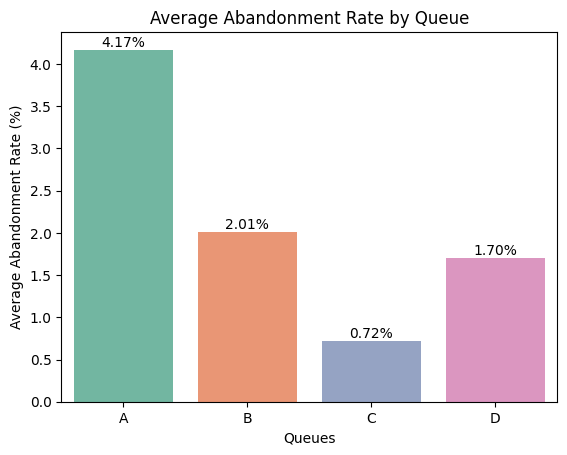

In [141]:
# Create visualization 1 here
# Import any additional libraries needed with alias

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = ((queue_dict["Abandoned"][i] / queue_dict["Calls"][i])*100).round(2)
list_abandonment_rates = [abandonment_rates[queue] for queue in queues]
list_abandonment_rates

#Your code below:
ax = sns.barplot(x = queues, y = list_abandonment_rates, hue=queues, legend=False, palette='Set2')
plt.title('Average Abandonment Rate by Queue')
plt.xlabel('Queues')
plt.ylabel('Average Abandonment Rate (%)')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', fontsize=10)

##### Record your answer below:

> Chart style you chose and why: I chose to use a column chart here because we are wanting to compare the abandonment rates (avg) between each queue. Using Abela's Chart Suggestions, we are comparing among items, there is one varaible per item and few categories with few itms. This way the visualization is clear and concise.  

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

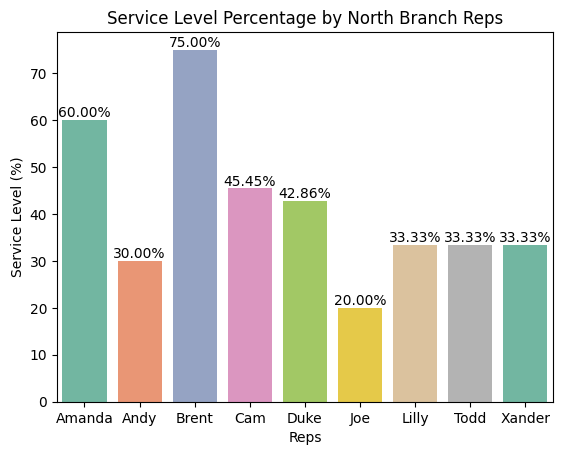

In [146]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
service_level

#Your Code Here:
# Average Speed of Answer by North Rep
ax = sns.barplot(x ='Rep ID', y = 'Incoming Wait Time', data=north_plt, hue='Rep ID', legend=False, palette='Set2')
plt.title('Average Speed of Answer by North Branch Reps')
plt.xlabel('Reps')
plt.ylabel('Average Speed of Answer (secs)')

for container in ax.containers:
    ax.bar_label(container, fmt='{:.2f}', fontsize=10)

# Service Level % for North Branch Reps
ax = sns.barplot(x ='Rep ID', y = 'Service Level %', data=service_level, hue='Rep ID', legend=False, palette='Set2')
plt.title('Service Level Percentage by North Branch Reps')
plt.xlabel('Reps')
plt.ylabel('Service Level (%)')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', fontsize=10)


##### Record your answer below:

> Chart style you chose and why: For both visualizations, I again used a column chart for the same reasons mentioned in viz task 1. We aren't looking at data over time or a relationship between the elements so we aren't going to use any visualization that looks at distribution or composition. 


#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: count, dtype: int64


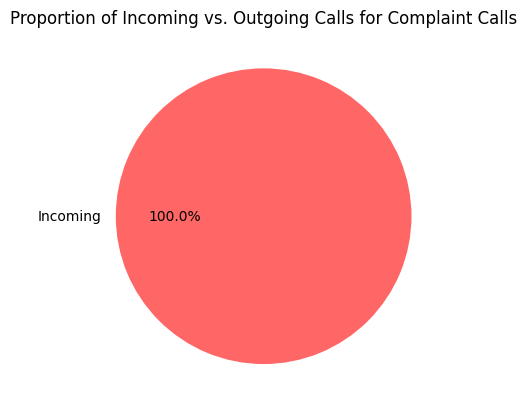

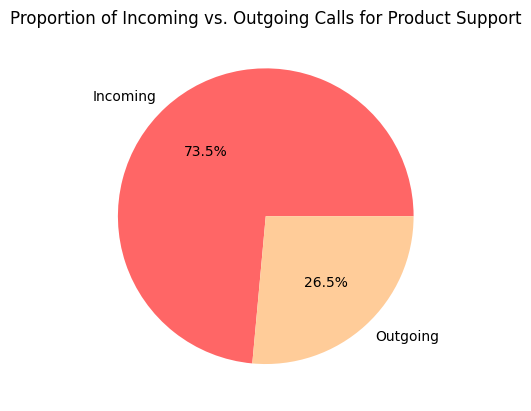

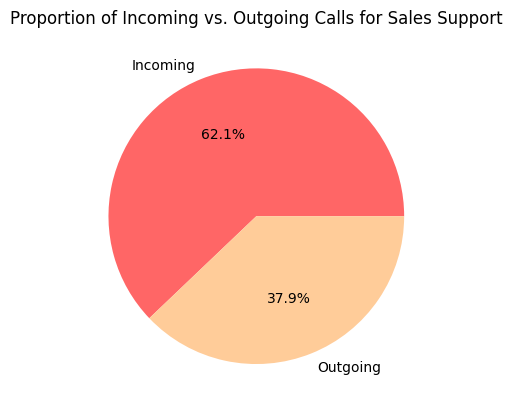

In [182]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
# Complaints Pie Chart
color =['#ff6666']
plt.figure(0)
complaint_counts = purpose_counts.loc["Complaint"]
complaint_counts2 = complaint_counts.values
labels = ['Incoming']
plt.pie(complaint_counts2, labels=labels, autopct='%1.1f%%', colors=color)
plt.title("Proportion of Incoming vs. Outgoing Calls for Complaint Calls")

# Product Support Pie Chart
plt.figure(1)
ps_counts = purpose_counts.loc["Product Support"]
ps_counts2 = ps_counts.values
labels = ['Incoming', 'Outgoing']
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
plt.pie(ps_counts2, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title("Proportion of Incoming vs. Outgoing Calls for Product Support")

# Sales Support Pie Charts
plt.figure(2)
ss_counts = purpose_counts.loc["Sales Support"]
ss_counts2 = ss_counts.values
labels = ['Incoming', 'Outgoing']
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
plt.pie(ss_counts2, labels=labels, autopct='%1.1f%%', colors = colors)
plt.title("Proportion of Incoming vs. Outgoing Calls for Sales Support")

plt.show()

##### Record your answer below:

> Chart style you chose and why: Despite being told pie charts aren't ideal, in this situation I think it's appropriate to display the data. We had to do 3 visualizations for each Call Purpose, and we are wanting to see the breakdown of incoming vs outgoing calls for each of those purposes. The pie charts allow us to see the composition for each call purpose. This may not be a good use if we were wanting to have 1 visualization for each call purpose.

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: I believe the South Branch is operating more efficiently based on those 3 KPIs. Both service level and average speed of answer don't vary between each branch, but the South Branch does have about a 1.6% better Abandonment Rate. I think it'd be interesting to be able to perform analyses to see if any of these values differences are statistically significant when accounting for the number of reps and the amount of calls taken.


North
- Avg Abandonment Rate: 2.86%
- Service Level %: 40.24%
- Avg Speed of Answer: 3.05 s

South
- Avg Abandonment Rate: 1.27%
- Service Level %: 38.10%
- Avg Speed of Answer: 3.00 s

Company
- Avg Abandonment Rate: 1.97%
- Service Level %: 38.94%
- Avg Speed of Answer 3.02 s

#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: The north branch could benefit from some more help as their KPIs may become more similar to the South's. 

North has 9 reps and South has 11 reps. 

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: I think what we were provided was sufficient. In order to get a better idea of each branch's call load, it could be interesting to know what product the company sells. Are the branches located in incomparable areas? Is the product more relevant in the south than the north? May better inform where the needs is for extra reps.


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [4]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:

NameError: name 'df' is not defined